In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [91]:
df = pd.read_csv('wine_data.csv', header=None, usecols=[0, 1, 2])
df.columns = ["class_label", "alcohol", "malic_acid"]
df.head()

,class_label,alcohol,malic_acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [92]:
df.describe()

,class_label,alcohol,malic_acid
count,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348
std,0.775035,0.811827,1.117146
min,1.000000,11.030000,0.740000
25%,1.000000,12.362500,1.602500
50%,2.000000,13.050000,1.865000
75%,3.000000,13.677500,3.082500
max,3.000000,14.830000,5.800000


<Axes: xlabel='alcohol', ylabel='Density'>

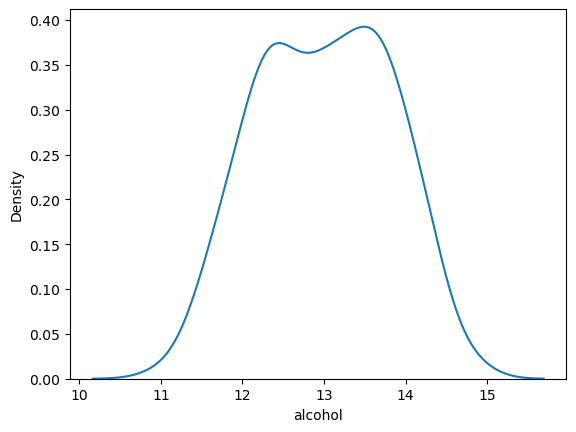

In [93]:
sns.kdeplot(df.alcohol)

<Axes: xlabel='malic_acid', ylabel='alcohol'>

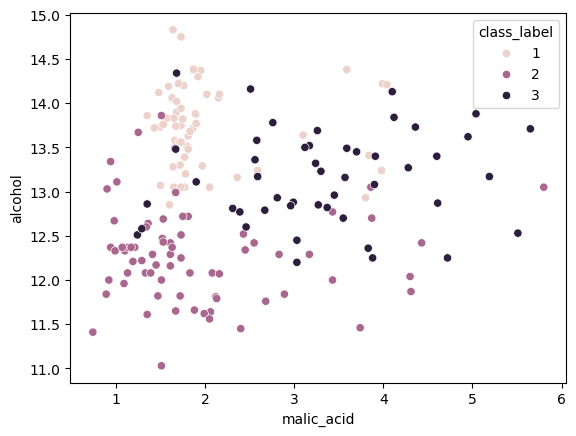

In [94]:
sns.scatterplot(x=df.malic_acid, y=df.alcohol, hue=df.class_label)

In [95]:
y = df.class_label
X = df.iloc[:, 1:3]

In [96]:
X

,alcohol,malic_acid
0,14.23,1.71
1,13.20,1.78
2,13.16,2.36
3,14.37,1.95
4,13.24,2.59
...,...,...
173,13.71,5.65
174,13.40,3.91
175,13.27,4.28
176,13.17,2.59


In [97]:
X.shape, y.shape

((178, 2), (178,))

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((142, 2), (36, 2))

In [99]:
scaler = MinMaxScaler()
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
scaled_X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [100]:
np.round(scaled_X_train.describe(), 2)

,alcohol,malic_acid
count,142.00,142.00
mean,0.53,0.33
std,0.22,0.23
min,0.00,0.00
25%,0.35,0.18
50%,0.54,0.24
75%,0.70,0.51
max,1.00,1.00


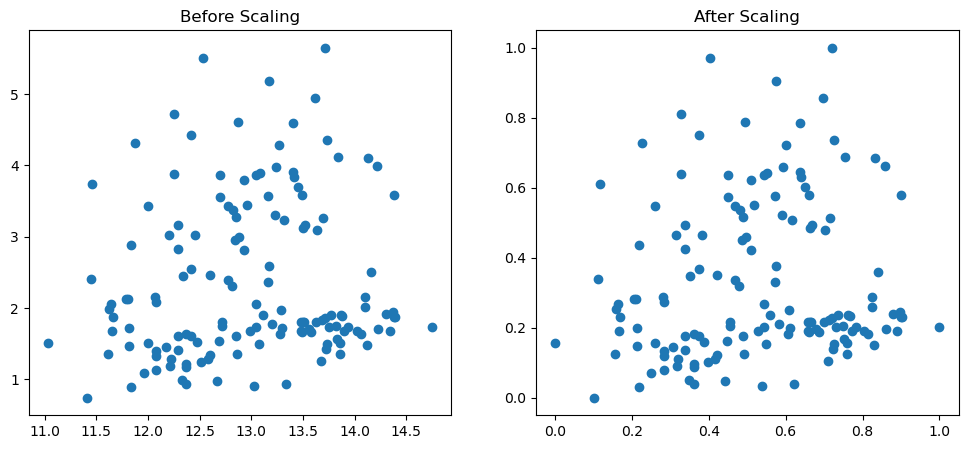

In [121]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.scatter(X_train.alcohol, X_train.malic_acid,)
ax1.set_title("Before Scaling")

ax2.scatter(scaled_X_train.alcohol, scaled_X_train.malic_acid)
ax2.set_title("After Scaling")
plt.show()

As we can see from the scatter plots, the scatters are identical however, their range is now different on both axes i.e, they are squeezed into 1X1 square after MinMaxScaling. During calculation of Normalization, 0 is the minimum value any row can attain and 1 is the max.

<Axes: title={'center': 'KDE Plot After Scaling'}, xlabel='alcohol', ylabel='Density'>

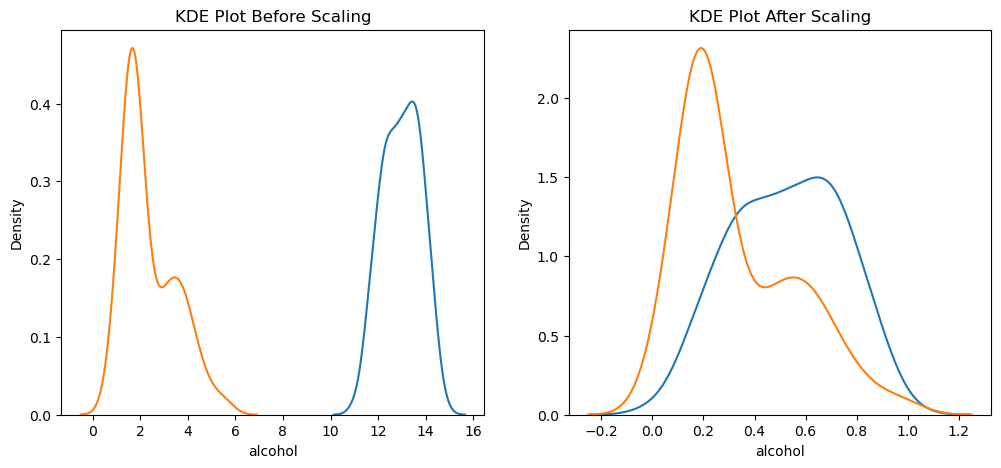

In [144]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.set_title("KDE Plot Before Scaling")
sns.kdeplot(X_train.alcohol, ax=ax1)
sns.kdeplot(X_train.malic_acid, ax=ax1)

ax2.set_title("KDE Plot After Scaling")
sns.kdeplot(scaled_X_train.alcohol, ax=ax2)
sns.kdeplot(scaled_X_train.malic_acid, ax=ax2)

#### Trying Robust Scaling

In [149]:
from sklearn.preprocessing import RobustScaler

In [153]:
scaler2 = RobustScaler()
scaled2_X_train = pd.DataFrame(scaler2.fit_transform(X_train), columns=X_train.columns)
scaled2_X_test = pd.DataFrame(scaler2.transform(X_test), columns=X_test.columns)

In [155]:
np.round(scaled2_X_train.describe(), 2)

,alcohol,malic_acid
count,142.00,142.00
mean,-0.04,0.29
std,0.63,0.69
min,-1.56,-0.71
25%,-0.54,-0.18
50%,0.00,-0.00
75%,0.46,0.82
max,1.33,2.32


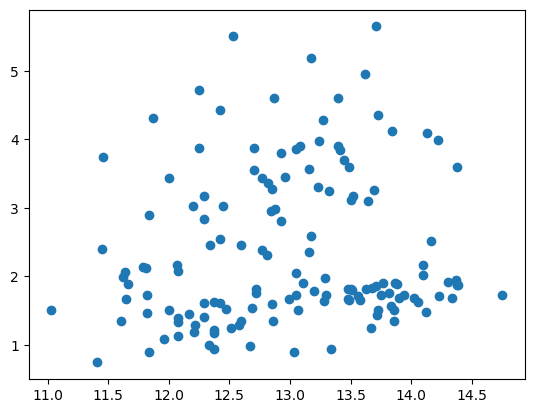

In [161]:
plt.scatter(X_train.alcohol, X_train.malic_acid)

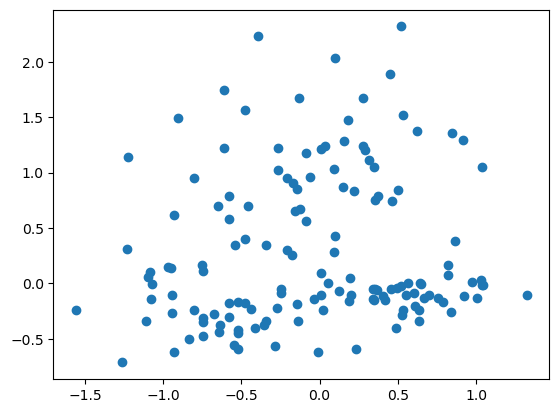

In [163]:
plt.scatter(scaled2_X_train.alcohol, scaled2_X_train.malic_acid)

#### Comparing two kde scaled KDE plots

<Axes: title={'center': 'KDE Plot After Scaling: RobustScaler'}, xlabel='alcohol', ylabel='Density'>

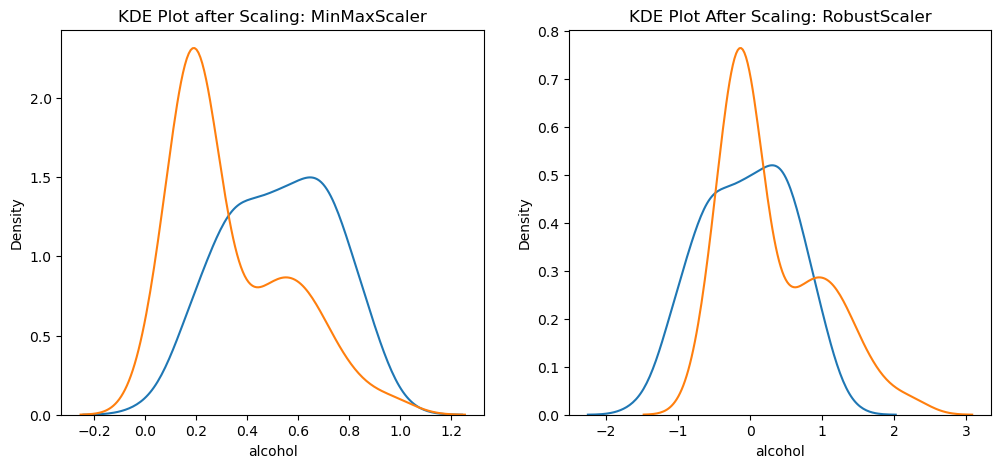

In [168]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.set_title("KDE Plot after Scaling: MinMaxScaler")
sns.kdeplot(scaled_X_train.alcohol, ax=ax1)
sns.kdeplot(scaled_X_train.malic_acid, ax=ax1)

ax2.set_title("KDE Plot After Scaling: RobustScaler")
sns.kdeplot(scaled2_X_train.alcohol, ax=ax2)
sns.kdeplot(scaled2_X_train.malic_acid, ax=ax2)